In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv("covid_19_indonesia_time_series_all.csv")
data.head()

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [70]:
data['Date'].unique()

array(['3/1/2020', '3/2/2020', '3/3/2020', '3/4/2020', '3/5/2020',
       '3/6/2020', '3/7/2020', '3/8/2020', '3/9/2020', '3/10/2020',
       '3/11/2020', '3/12/2020', '3/13/2020', '3/14/2020', '3/15/2020',
       '3/16/2020', '3/17/2020', '3/18/2020', '3/19/2020', '3/20/2020',
       '3/21/2020', '3/22/2020', '3/23/2020', '3/24/2020', '3/25/2020',
       '3/26/2020', '3/27/2020', '3/28/2020', '3/29/2020', '3/30/2020',
       '3/31/2020', '4/1/2020', '4/2/2020', '4/3/2020', '4/4/2020',
       '4/5/2020', '4/6/2020', '4/7/2020', '4/8/2020', '4/9/2020',
       '4/10/2020', '4/11/2020', '4/12/2020', '4/13/2020', '4/14/2020',
       '4/15/2020', '4/16/2020', '4/17/2020', '4/18/2020', '4/19/2020',
       '4/20/2020', '4/21/2020', '4/22/2020', '4/23/2020', '4/24/2020',
       '4/25/2020', '4/26/2020', '4/27/2020', '4/28/2020', '4/29/2020',
       '4/30/2020', '5/1/2020', '5/2/2020', '5/3/2020', '5/4/2020',
       '5/5/2020', '5/6/2020', '5/7/2020', '5/8/2020', '5/9/2020',
       '5/10/2020',

In [71]:
last_date= '9/16/2022'
data[data['Date']==last_date]

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
31821,9/16/2022,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,...,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


In [72]:
unique_Province = data[data['Total Cases']>0]['Province'].unique()
unique_Province

array(['DKI Jakarta', nan, 'Riau', 'Jawa Barat', 'Banten', 'Jawa Tengah',
       'Sulawesi Tenggara', 'Bali', 'Kalimantan Timur',
       'Daerah Istimewa Yogyakarta', 'Sumatera Utara', 'Jawa Timur',
       'Kepulauan Riau', 'Sulawesi Selatan', 'Jambi', 'Maluku', 'Papua',
       'Maluku Utara', 'Sumatera Selatan', 'Aceh', 'Kalimantan Tengah',
       'Lampung', 'Sulawesi Tengah', 'Sulawesi Utara', 'Sumatera Barat',
       'Papua Barat', 'Kalimantan Utara', 'Sulawesi Barat',
       'Kalimantan Barat', 'Kalimantan Selatan',
       'Kepulauan Bangka Belitung', 'Bengkulu', 'Nusa Tenggara Barat',
       'Nusa Tenggara Timur', 'Gorontalo'], dtype=object)

In [73]:
Province_total_case = []
for i in unique_Province:
  Province_total_case.append(data[(data['Total Cases']>0)&(data['Province']==i)]['Total Cases'].sum())

In [74]:
print(set(zip(unique_Province, Province_total_case)))

{('Bali', 66247623), ('Jawa Timur', 239912685), ('Bengkulu', 12347482), (nan, 0), ('Sulawesi Barat', 6865029), ('Kepulauan Bangka Belitung', 26613493), ('Kalimantan Selatan', 39485248), ('Gorontalo', 6746166), ('Daerah Istimewa Yogyakarta', 86090207), ('Riau', 68594950), ('Sulawesi Selatan', 66922249), ('Sumatera Utara', 60912221), ('Kepulauan Riau', 29043850), ('Sulawesi Tenggara', 12244125), ('Sulawesi Tengah', 24193556), ('Kalimantan Barat', 23403342), ('Sulawesi Utara', 21715953), ('Jawa Tengah', 273046506), ('Jambi', 15700629), ('Kalimantan Utara', 18782628), ('Aceh', 19962180), ('DKI Jakarta', 545806047), ('Jawa Barat', 439196053), ('Kalimantan Timur', 89582475), ('Papua Barat', 13634548), ('Nusa Tenggara Timur', 34710372), ('Sumatera Barat', 49292155), ('Maluku Utara', 6781984), ('Sumatera Selatan', 34483096), ('Kalimantan Tengah', 25507275), ('Nusa Tenggara Barat', 15887423), ('Maluku', 9046656), ('Papua', 22285548), ('Lampung', 28891786), ('Banten', 100598017)}


In [75]:
nan_indices = []
for i in range(len(unique_Province)):
  if type(unique_Province[i])==float:
    nan_indices.append(i)

In [76]:
unique_Province = list(unique_Province)
Province_total_case = list(Province_total_case)

In [77]:
for i in nan_indices:
  unique_Province.pop(i)
  Province_total_case.pop(i)

unique_Province

['DKI Jakarta',
 'Riau',
 'Jawa Barat',
 'Banten',
 'Jawa Tengah',
 'Sulawesi Tenggara',
 'Bali',
 'Kalimantan Timur',
 'Daerah Istimewa Yogyakarta',
 'Sumatera Utara',
 'Jawa Timur',
 'Kepulauan Riau',
 'Sulawesi Selatan',
 'Jambi',
 'Maluku',
 'Papua',
 'Maluku Utara',
 'Sumatera Selatan',
 'Aceh',
 'Kalimantan Tengah',
 'Lampung',
 'Sulawesi Tengah',
 'Sulawesi Utara',
 'Sumatera Barat',
 'Papua Barat',
 'Kalimantan Utara',
 'Sulawesi Barat',
 'Kalimantan Barat',
 'Kalimantan Selatan',
 'Kepulauan Bangka Belitung',
 'Bengkulu',
 'Nusa Tenggara Barat',
 'Nusa Tenggara Timur',
 'Gorontalo']

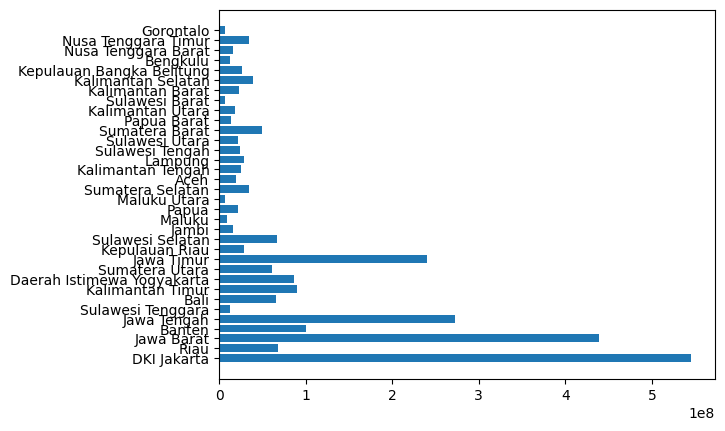

In [78]:
plt.barh(unique_Province, Province_total_case)
plt.show()

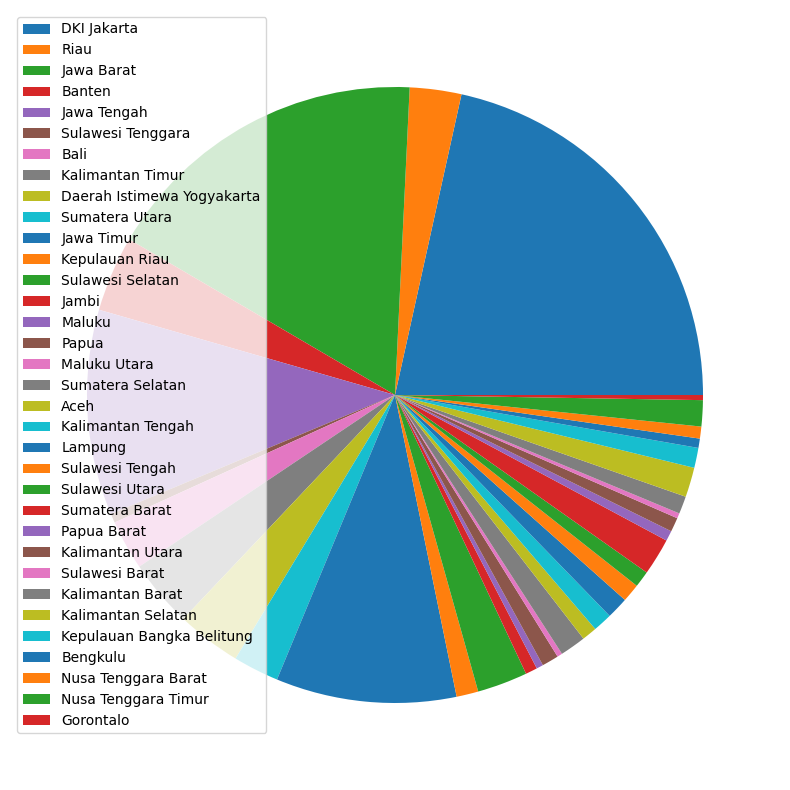

In [79]:
plt.figure(figsize=(10,10))
plt.pie(Province_total_case)
plt.legend(unique_Province, loc='best')
plt.show()